# A0.4 Damped vibration - direct fitting method
by H cyan

huangzw29@mail2.sysu.edu.cn

2021.4.22

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## EXP1 Steel rule

### Import data

*wrong*

In [19]:
# df = pd.read_csv(r'Steel_rule_data\Raw Data140.csv')
# df.head(10)
# t_origin = np.array(df['Time (s)'][100:])
# a_origin = np.array(df['Linear Acceleration z (m/s^2)'][100:])

*correct*

In [20]:
df = pd.read_csv(r'Steel_rule_data\Raw Data140.csv')
df.drop(df.head(100).index, inplace=True)
df['Time (s)'] = df['Time (s)'] - df.iloc[0,0]
df.reset_index(drop=True, inplace=True)
print(df.head(10))

t_origin = np.array(df['Time (s)'])
a_origin = np.array(df['Linear Acceleration z (m/s^2)'])

   Time (s)  Linear Acceleration x (m/s^2)  Linear Acceleration y (m/s^2)  \
0  0.000000                      -0.696682                      -0.191056   
1  0.019316                      -1.348124                       0.162585   
2  0.038633                       0.146442                       0.310579   
3  0.057974                       1.206787                      -0.224455   
4  0.077291                       1.193879                      -0.281025   
5  0.096612                       1.020894                       0.278781   
6  0.115954                       0.337313                       0.004206   
7  0.135271                      -0.701936                      -0.143966   
8  0.154587                      -1.258423                       0.227546   
9  0.173904                       0.156536                       0.279367   

   Linear Acceleration z (m/s^2)  Absolute acceleration (m/s^2)  
0                      -8.458036                       8.488831  
1                   

### Original curve

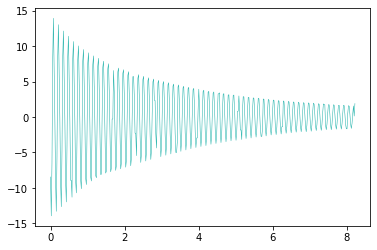

In [21]:
plt.plot(t_origin, a_origin, linewidth=0.5, color='lightseagreen')

### Fitting

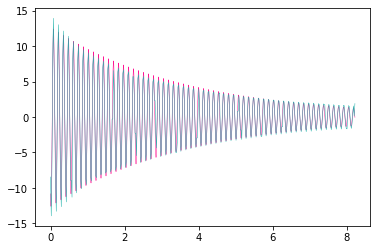

In [22]:
def a_t(t, A1, bt, omg, A4, A5):
    return A1 * (omg**2) * np.exp(-bt*t) * np.cos(omg*t + A4) + A5

# param_bounds=([-1, -1, 40, 0, -1], [1, 1, 50, 4, 1])
# popt, pcov = curve_fit(a_t, t_origin, a_origin, bounds=param_bounds)
popt, pcov = curve_fit(a_t, t_origin, a_origin)

t_dense = np.linspace(t_origin.min(), t_origin.max(), 10000)

avals = a_t(t_dense, popt[0], popt[1], popt[2], popt[3], popt[4])
Omega = popt[2]
beta = popt[1]

plt.plot(t_dense, avals, linewidth=0.5, color='deeppink')
plt.plot(t_origin, a_origin, linewidth=0.5, color='lightseagreen')

In [23]:
print('omega: '+str(Omega), 'T: '+str(2*np.pi/Omega), 'beta: '+str(beta))

omega: 46.547781916549404 T: 0.1349835598706732 beta: 0.27914365604022845


In [24]:
print(popt)

[5.84506061e-03 2.79143656e-01 4.65477819e+01 2.60097313e+00
 2.98173210e-02]


### Subplot

Text(0.5, 0.05, 'Fig.2 Direct Fitting. L=140mm')

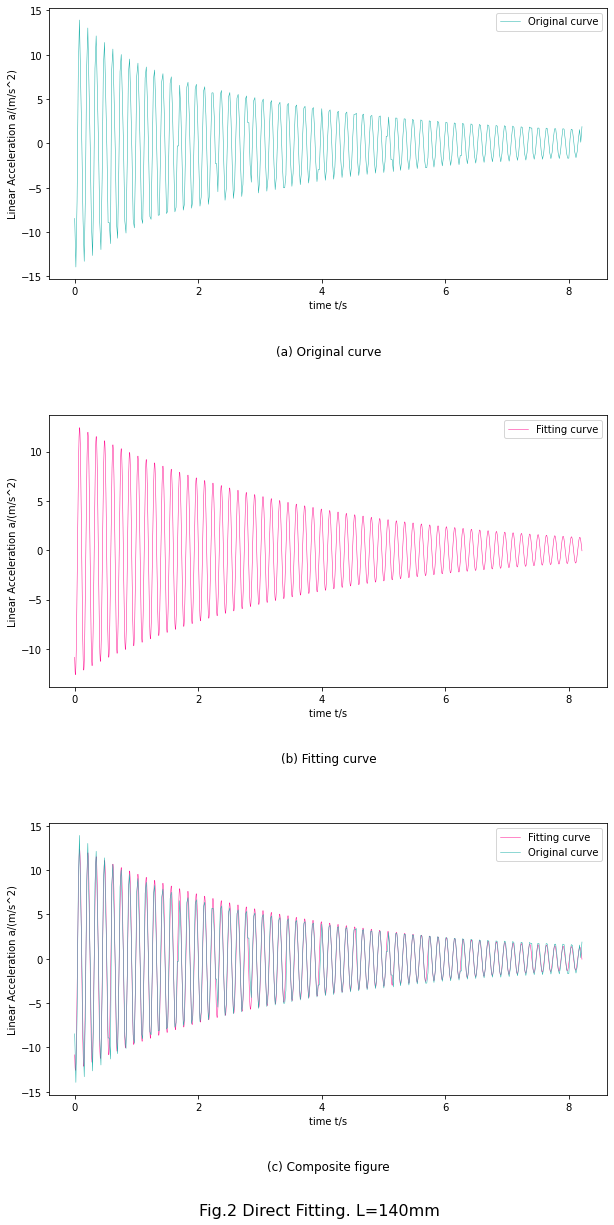

In [25]:
fig, a =  plt.subplots(3,1,figsize=(10, 20))

a[0].plot(t_origin, a_origin, linewidth=0.5, color='lightseagreen', label='Original curve')

a[0].set_xlabel('time t/s')
a[0].set_ylabel('Linear Acceleration a/(m/s^2)')
a[0].set_title('(a) Original curve', y=-0.3)
a[0].legend()


a[1].plot(t_dense, avals, color='deeppink', linewidth=0.5, label='Fitting curve')

a[1].set_xlabel('time t/s')
a[1].set_ylabel('Linear Acceleration a/(m/s^2)')
a[1].set_title('(b) Fitting curve', y=-0.3)
a[1].legend()


a[2].plot(t_dense, avals, color='deeppink', linewidth=0.5, label='Fitting curve')
a[2].plot(t_origin, a_origin, linewidth=0.5, color='lightseagreen', label='Original curve')


a[2].set_xlabel('time t/s')
a[2].set_ylabel('Linear Acceleration a/(m/s^2)')
a[2].set_title('(c) Composite figure', y=-0.3)
a[2].legend()

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
plt.suptitle('Fig.{} Direct Fitting. L={}mm'.format(2, 140), y=0.05, fontsize=16)